# Import necessary modules

In [1]:
from segmentation import WeaklySupervisedCrackSeg
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import matplotlib.pyplot as plt

# Set up variables and hyperparameters
Note: the classifier type can either be R50 (ResNet50), R101 (ResNet101) or R152 (ResNet152). Weights are only provided for ResNet50 and some changes need to be performed in the source to implement other classifiers.

In [2]:
# set up variables
CLASSIFIER_TYPE = "R50" # ResNet50
CLASSIFIER_WEIGHT_PATH = "./weights/classifier_R50_CFD.h5"
PATCH_SIZE = 32
STRIDE_CLASSIFIER = 16
STRIDE_THRESHOLDING = 8

# data paths
example_img_path = "./data/example/img/"

# Setup of our weakly supervised crack segmentation approach.

In [3]:
weakly = WeaklySupervisedCrackSeg(
    classifier_type=CLASSIFIER_TYPE,
    classifier_weight_path=CLASSIFIER_WEIGHT_PATH,
    patch_size=PATCH_SIZE,
    stride_classifier=STRIDE_CLASSIFIER,
    stride_thresholding=STRIDE_THRESHOLDING,
)

--- Classification Model -----
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              2049000   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2002      
Total params: 25,638,714
Trainable params: 25,585,594
Non-trainable params: 53,120
_________________________________________________________________
None


# Loading of Example Images

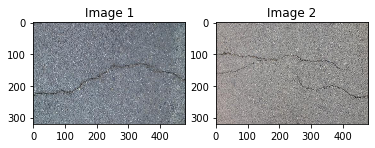

In [4]:
img1 = load_img("./data/example/img/073.jpg",color_mode="rgb")
img1 = np.array(img1)
img2 = load_img("./data/example/img/091.jpg",color_mode="rgb")
img2 = np.array(img2)

_, axarr = plt.subplots(1,2)
axarr[0].set_title("Image 1")
axarr[1].set_title("Image 2")
axarr[0].imshow(img1)
axarr[1].imshow(img2)


# Run inference
the .predict() method creates the prediction. If the function argument is set to detailed=True, the interim outputs are returned as well. 

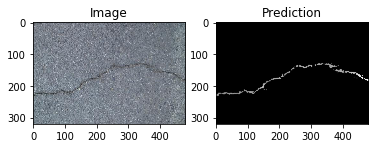

In [5]:
prediction = weakly.predict(img1)

#show results
_, axarr = plt.subplots(1,2)
axarr[0].set_title("Image")
axarr[1].set_title("Prediction")
axarr[0].imshow(img1)
axarr[1].imshow(prediction, cmap=plt.get_cmap('gray'))

In [6]:
segmentation, grad_cam_plus, merged_classifier_pred, merge_cam_class, thresholded = weakly.predict(img1, detailed_output=True)

#show results
_, axarr = plt.subplots(1,6, figsize=(18,4))
axarr[0].set_title("Image")
axarr[1].set_title("Prediction")
axarr[2].set_title("Localisation Map")
axarr[3].set_title("Thresholding Result")
axarr[4].set_title("Classification Result")
axarr[5].set_title("Class Activation Map")

axarr[0].imshow(img1)
axarr[1].imshow(prediction, cmap=plt.get_cmap('gray'))
axarr[2].imshow(merge_cam_class, cmap=plt.get_cmap('gray'))
axarr[3].imshow(thresholded, cmap=plt.get_cmap('gray'))
axarr[4].imshow(merged_classifier_pred, cmap=plt.get_cmap('gray'))
axarr[5].imshow(grad_cam_plus, cmap=plt.get_cmap('gray'))

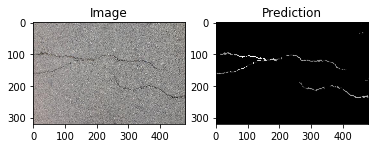

In [ ]:
prediction = weakly.predict(img2)

#show results
_, axarr = plt.subplots(1,2)
axarr[0].set_title("Image")
axarr[1].set_title("Prediction")
axarr[0].imshow(img2)
axarr[1].imshow(prediction, cmap=plt.get_cmap('gray'))

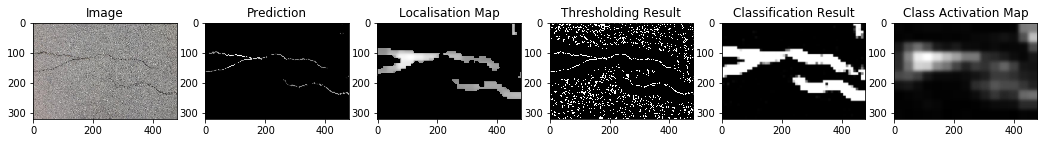

In [ ]:
segmentation, grad_cam_plus, merged_classifier_pred, merge_cam_class, thresholded = weakly.predict(img2, detailed_output=True)

#show results
_, axarr = plt.subplots(1,6, figsize=(18,4))
axarr[0].set_title("Image")
axarr[1].set_title("Prediction")
axarr[2].set_title("Localisation Map")
axarr[3].set_title("Thresholding Result")
axarr[4].set_title("Classification Result")
axarr[5].set_title("Class Activation Map")

axarr[0].imshow(img2)
axarr[1].imshow(prediction, cmap=plt.get_cmap('gray'))
axarr[2].imshow(merge_cam_class, cmap=plt.get_cmap('gray'))
axarr[3].imshow(thresholded, cmap=plt.get_cmap('gray'))
axarr[4].imshow(merged_classifier_pred, cmap=plt.get_cmap('gray'))
axarr[5].imshow(grad_cam_plus, cmap=plt.get_cmap('gray'))